In [1]:
# 단계 1: 폰트 설치
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
!apt-get -qq -y install fonts-nanum > /dev/null
#fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

#font = fm.FontProperties(fname=fontpath, size=9)

#fm._rebuild()



fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [1]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설

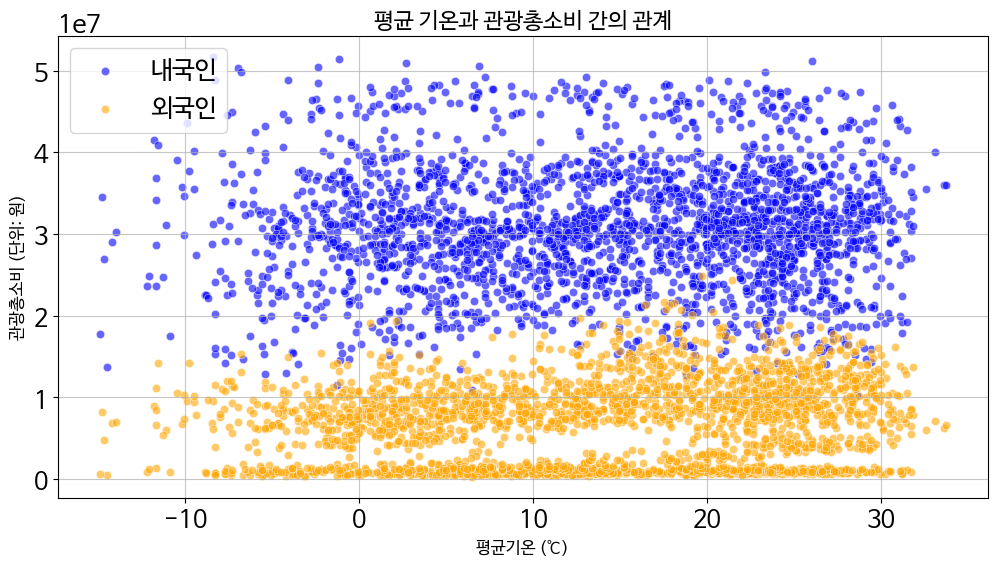

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSV 파일 경로 설정 (Colab에 맞게 파일 경로를 수정하세요)
file_path = '/content/최종_병합된_데이터.csv'

# 데이터 로드
data = pd.read_csv(file_path)

# '기준년월'을 datetime 형식으로 변환
data['기준년월'] = pd.to_datetime(data['기준년월'], format='%Y%m%d')

# 내국인과 외국인 데이터 분리
data_domestic = data[data['구분'] == '내국인']
data_foreign = data[data['구분'] == '외국인']

# 시각화: 기온과 관광총소비 간의 관계
plt.figure(figsize=(12, 6))

# 내국인
sns.scatterplot(data=data_domestic, x='평균기온(℃)', y='관광총소비', label='내국인', color='blue', alpha=0.6)

# 외국인
sns.scatterplot(data=data_foreign, x='평균기온(℃)', y='관광총소비', label='외국인', color='orange', alpha=0.6)

plt.title('평균 기온과 관광총소비 간의 관계', fontsize=16)
plt.xlabel('평균기온 (℃)', fontsize=12)
plt.ylabel('관광총소비 (단위: 원)', fontsize=12)
plt.legend()
plt.grid(visible=True, alpha=0.7)
plt.show()


<ipython-input-6-f5ced9796fc4>:19: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = data.pivot_table(index='기온구간', columns='구분', values='관광총소비', aggfunc='mean')


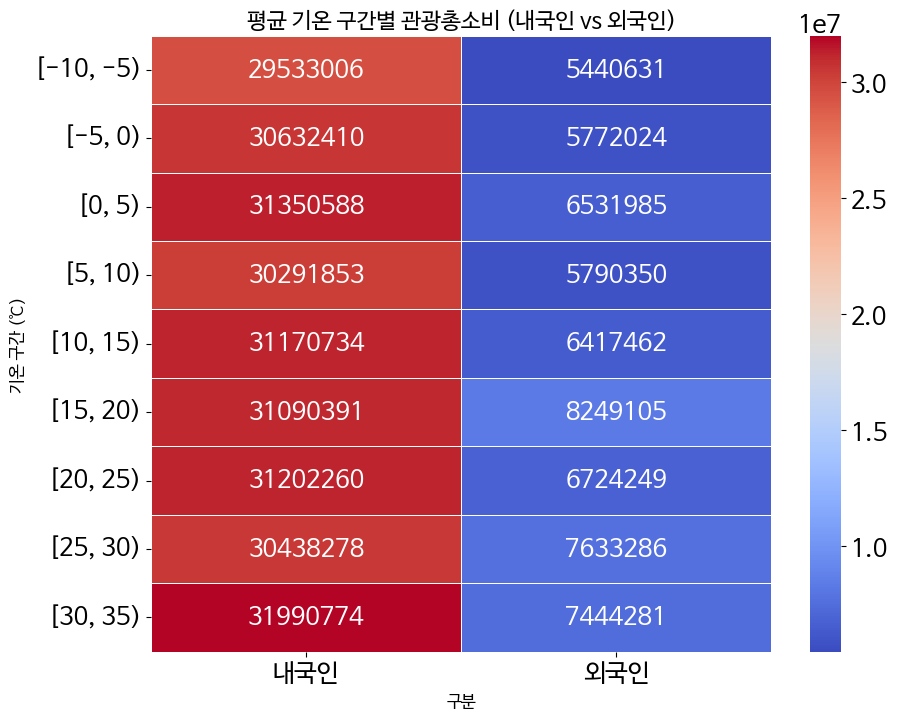

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# CSV 파일 경로 설정 (Colab에 맞게 파일 경로를 수정하세요)
file_path = '/content/최종_병합된_데이터.csv'

# 데이터 로드
data = pd.read_csv(file_path)

# '기준년월'을 datetime 형식으로 변환
data['기준년월'] = pd.to_datetime(data['기준년월'], format='%Y%m%d')

# 기온을 범주형 구간으로 변환
data['기온구간'] = pd.cut(data['평균기온(℃)'], bins=np.arange(-10, 40, 5), right=False)

# 내국인과 외국인별로 그룹화하여 관광총소비 평균 계산
heatmap_data = data.pivot_table(index='기온구간', columns='구분', values='관광총소비', aggfunc='mean')

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5)
plt.title('평균 기온 구간별 관광총소비 (내국인 vs 외국인)', fontsize=16)
plt.xlabel('구분', fontsize=12)
plt.ylabel('기온 구간 (℃)', fontsize=12)
plt.show()


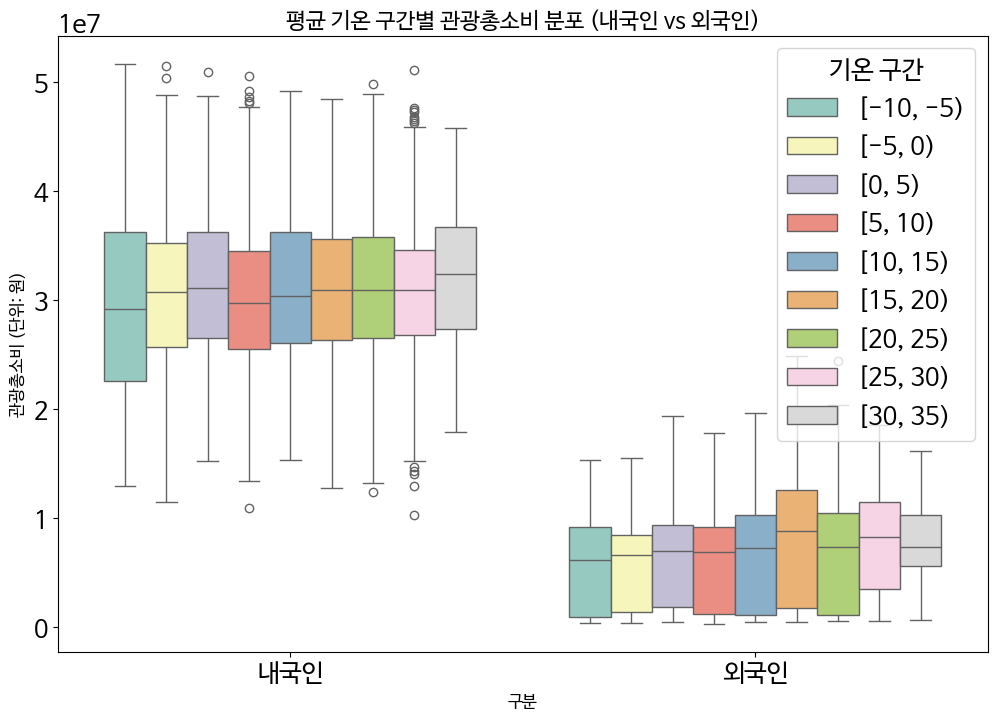

In [7]:
plt.figure(figsize=(12, 8))

# 내국인과 외국인 데이터를 하나의 박스 플롯으로 비교
sns.boxplot(data=data, x='구분', y='관광총소비', hue='기온구간', palette='Set3')

plt.title('평균 기온 구간별 관광총소비 분포 (내국인 vs 외국인)', fontsize=16)
plt.xlabel('구분', fontsize=12)
plt.ylabel('관광총소비 (단위: 원)', fontsize=12)
plt.legend(title='기온 구간')
plt.show()


<ipython-input-14-073a5225aa0f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  domestic_data['월'] = domestic_data['기준년월'].dt.month
<ipython-input-14-073a5225aa0f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  domestic_data['Season'] = domestic_data['월'].apply(assign_season)
<ipython-input-14-073a5225aa0f>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barpl

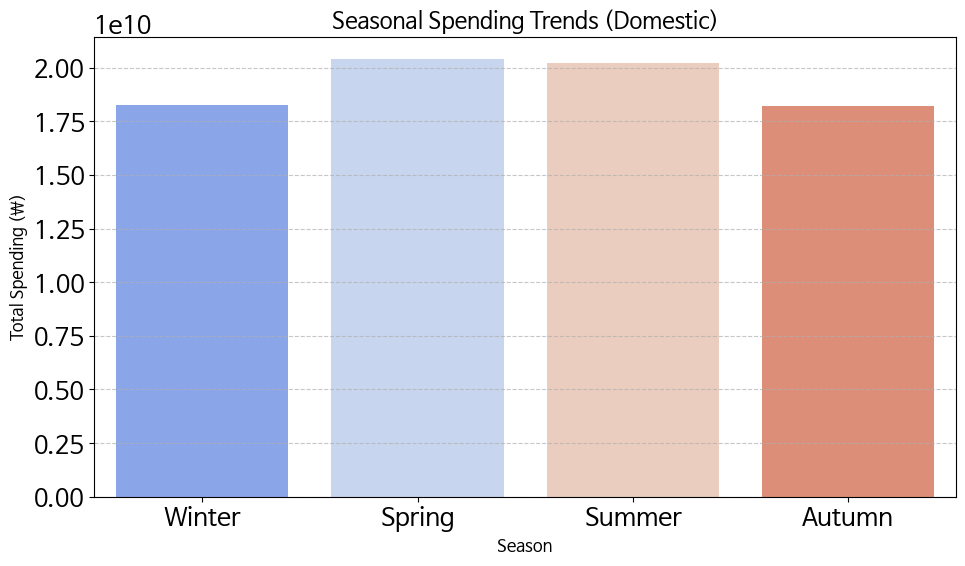

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드
file_path = '/content/최종_병합된_데이터.csv'
data = pd.read_csv(file_path)

# '기준년월'을 datetime 형식으로 변환
data['기준년월'] = pd.to_datetime(data['기준년월'], format='%Y%m%d')

# 내국인 데이터만 필터링
domestic_data = data[data['구분'] == '내국인']

# '월' 컬럼 추가
domestic_data['월'] = domestic_data['기준년월'].dt.month

# 월을 기준으로 계절을 할당하는 함수 정의
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'  # 겨울
    elif month in [3, 4, 5]:
        return 'Spring'  # 봄
    elif month in [6, 7, 8]:
        return 'Summer'  # 여름
    elif month in [9, 10, 11]:
        return 'Autumn'  # 가을

# 계절 할당 함수 적용
domestic_data['Season'] = domestic_data['월'].apply(assign_season)

# 계절별 관광 총소비 합계 계산
seasonal_spending_domestic = domestic_data.groupby('Season')['관광총소비'].sum().reset_index()

# 계절 순서를 논리적으로 정렬
season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
seasonal_spending_domestic['Season'] = pd.Categorical(seasonal_spending_domestic['Season'], categories=season_order, ordered=True)
seasonal_spending_domestic = seasonal_spending_domestic.sort_values('Season')

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_spending_domestic, x='Season', y='관광총소비', palette='coolwarm')
plt.title('내국인의 계절별 소비 추이', fontsize=16)
plt.xlabel('계절', fontsize=12)
plt.ylabel('총 소비액 (₩)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-15-8894f6c57571>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foreign_data['월'] = foreign_data['기준년월'].dt.month
<ipython-input-15-8894f6c57571>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foreign_data['Season'] = foreign_data['월'].apply(assign_season)
<ipython-input-15-8894f6c57571>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(d

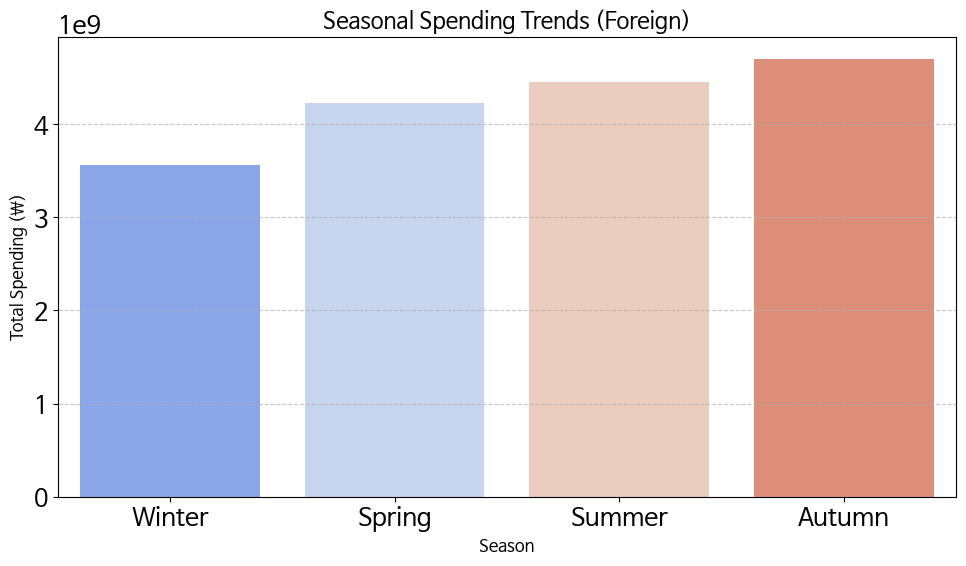

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드
file_path = '/content/최종_병합된_데이터.csv'
data = pd.read_csv(file_path)

# '기준년월'을 datetime 형식으로 변환
data['기준년월'] = pd.to_datetime(data['기준년월'], format='%Y%m%d')

# 외국인 데이터만 필터링
foreign_data = data[data['구분'] == '외국인']

# '월' 컬럼 추가
foreign_data['월'] = foreign_data['기준년월'].dt.month

# 월을 기준으로 계절을 할당하는 함수 정의
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'  # 겨울
    elif month in [3, 4, 5]:
        return 'Spring'  # 봄
    elif month in [6, 7, 8]:
        return 'Summer'  # 여름
    elif month in [9, 10, 11]:
        return 'Autumn'  # 가을

# 계절 할당 함수 적용
foreign_data['Season'] = foreign_data['월'].apply(assign_season)

# 계절별 관광 총소비 합계 계산
seasonal_spending_foreign = foreign_data.groupby('Season')['관광총소비'].sum().reset_index()

# 계절 순서를 논리적으로 정렬
season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
seasonal_spending_foreign['Season'] = pd.Categorical(seasonal_spending_foreign['Season'], categories=season_order, ordered=True)
seasonal_spending_foreign = seasonal_spending_foreign.sort_values('Season')

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_spending_foreign, x='Season', y='관광총소비', palette='coolwarm')
plt.title('외국인의 계절별 소비 추이', fontsize=16)
plt.xlabel('계절', fontsize=12)
plt.ylabel('총 소비액 (₩)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
